In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
# load data
import scipy.io as sio
data_rec = sio.loadmat('.\\data\\eq_set\\rec_4psk')['x_4psk']
data_cl = sio.loadmat('.\\data\\eq_set\\cl_4psk')['y_4psk']
print(data_rec.shape)
data_rec = data_rec.reshape([data_rec.shape[1],])
data_cl = data_cl.reshape([data_cl.shape[1],])
data_rec = data_rec.astype(dtype=np.complex64)
data_cl = data_cl.astype(dtype=np.complex64)
print(type(data_rec[0]))

(1, 102400)
<class 'numpy.complex64'>


In [2]:
train_len = 1024*5
x_train = data_rec[:train_len]
x_val = data_rec[train_len:]
y_train = data_cl[:train_len]
y_val = data_cl[train_len:]

In [3]:
R2 = np.mean(np.power(np.abs(y_train), 4))/np.mean(np.power(np.abs(y_train), 2))
w_len = 50
w = np.zeros([w_len, 1],dtype=np.complex64)
w[w_len//2 -1] = 4. + 0.j
x_len = len(x_train)
epoch = 1000
loss = np.zeros([epoch])
step_size = 0.001
mini_batch = 100

In [4]:
for i in range(1, epoch+1):
    count = 0
    x_batch = np.array([])
    e = np.zeros([mini_batch], dtype=np.complex64)
    for j in range(0, x_len-w_len+1):    
        x = x_train[j:j+w_len]
        x = x[-1::-1]
        y = np.matmul(x.reshape([1,len(x)]), np.conj(w))[0][0]
        e[count]=np.conj(y)*(np.square(np.abs(y))-R2).astype(np.complex64)
        count += 1
        if count == 1:
            x_batch = np.concatenate([x_batch, x])
        else:
            x_batch = np.concatenate([np.array([x[0]]), x_batch])
        if count == mini_batch:
            dw = np.zeros([w_len, 1], dtype=np.complex64)
            for k in range(w_len):
                x = x_batch[k:k+count]
                x = x[-1::-1]
                dw[k] = np.matmul(np.reshape(e, [1, -1]), np.reshape(x, [-1, 1]))
            w = w - step_size * dw
            count = 0
            x_batch = np.array([])
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000


(97231,)
(5071,)


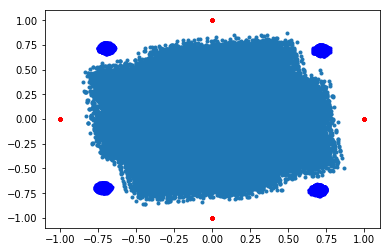

In [10]:
def conv(x, w):
    # valid mod
    w_len = len(w)
    x_len = len(x)
    y_pred = np.zeros([x_len-w_len+1], dtype=np.complex64)
    for i in range(0, x_len-w_len+1):
        y_pred[i] = np.matmul(x[i:i+w_len], np.conj(w))
    return np.reshape(y_pred, [-1])

y_hat = conv(x_val[-1::-1], w)

# cma cannot rectify the phase
plt.figure()
plt.plot(np.real(x_val), np.imag(x_val),'.')
plt.plot(np.real(y_hat), np.imag(y_hat),'.b')
plt.plot(np.real(y_val), np.imag(y_val),'.r')